### EDA(SJH)

In [2]:
from utils import Dataloader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

path = 'data'
movies_df = Dataloader.load_movies(path)
ratings_df = Dataloader.load_ratings(path)
users_df = Dataloader.load_users(path)

In [3]:
users_df

,userId,gender,age,Occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [4]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [5]:
display(ratings_df.info())
display(users_df.info())
display(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userId      6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


None

In [6]:
display(movies_df.duplicated().sum())
display(ratings_df.duplicated().sum())
display(users_df.duplicated().sum())

0

0

0

### 08/10 목요일 시각화 할것
- 가장 평점이 높은 영화 top5
- 가장 평점이 높은 장르 top5

In [7]:
rating_top = ratings_df.groupby('movieId')['rating'].agg(['mean', 'count'])

# 평점 1개에 5점짜리 영화가 많아서 평점개수의 중앙값을 찾은 뒤 그 이상의 데이터들만 가지고 가장 평점이 높은 영화 top5선정
rating_top['count'].median()

123.5

In [8]:
rating_top5 = rating_top.loc[rating_top['count']>123.5]
rating_top5 = rating_top5['mean'].sort_values(ascending=False)

In [9]:
# rating_top5 시리즈를 데이터프레임으로 변환
rating_top5_df = rating_top5.to_frame(name='rating')
rating_top5_df

,rating
movieId,
2019,4.560510
318,4.554558
858,4.524966
745,4.520548
50,4.517106
...,...
2382,1.766667
2555,1.701220
2383,1.657718


In [10]:
# movies_df의 인덱스를 'movieId'로 설정
movies_df_sample = movies_df.set_index('movieId')

rating_top5_df['title'] = movies_df_sample['title']

rating_top5_df['genres'] = movies_df_sample['genres']

In [11]:
rating_top5_df = rating_top5_df.head(5)

In [12]:
# 위의 데이터프레임이 제대로 되었나 확인용
movies_df.loc[movies_df['movieId']==2019]

,movieId,title,genres
1950,2019,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama


In [13]:
rating_top5_df

,rating,title,genres
movieId,,,
2019,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama
318,4.554558,"Shawshank Redemption, The (1994)",Drama
858,4.524966,"Godfather, The (1972)",Action|Crime|Drama
745,4.520548,"Close Shave, A (1995)",Animation|Comedy|Thriller
50,4.517106,"Usual Suspects, The (1995)",Crime|Thriller


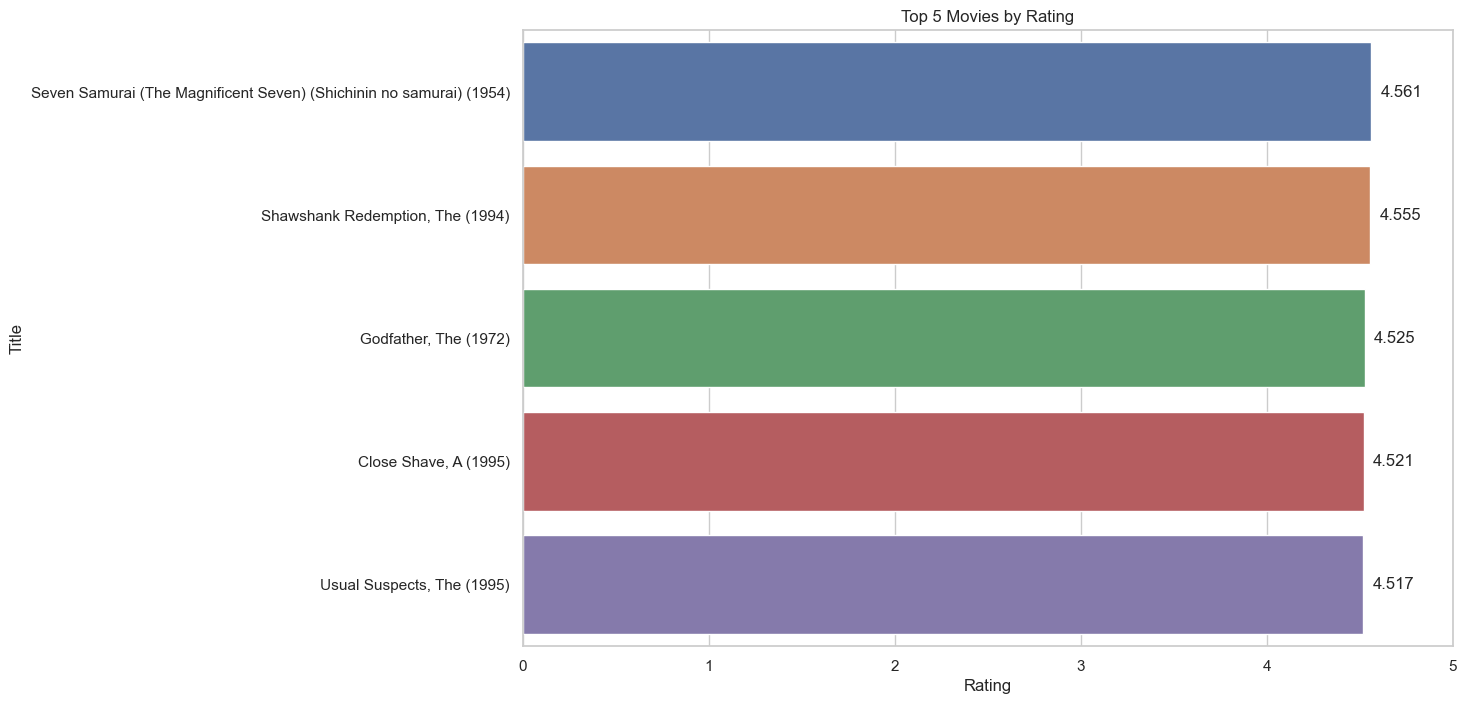

In [14]:
# 가장 평점이 높은 영화 top5

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='rating', y='title', data=rating_top5_df)
plt.xlabel('Rating')
plt.ylabel('Title')
plt.title('Top 5 Movies by Rating')
# x축 범위 설정
plt.xlim(0, 5)

# 각 막대의 중간에 레이팅 값 표시
for p in ax.patches:
    rating_value = p.get_width()  # 막대의 너비(레이팅 값)
    title = p.get_y() + p.get_height() / 2  # 막대의 중간 y 좌표
    ax.text(rating_value + 0.05, title, f'{rating_value:.3f}', va='center')  # 숫자 표시

plt.show()

In [15]:
movies_df_top = movies_df.copy()

movies_df_top['genres'] = movies_df['genres'].str.split('|')

movies_df_top

,movieId,title,genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy]
3879,3949,Requiem for a Dream (2000),[Drama]
3880,3950,Tigerland (2000),[Drama]
3881,3951,Two Family House (2000),[Drama]


In [16]:
movies_expanded = movies_df_top.explode('genres')
movies_expanded

,movieId,title,genres
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
...,...,...,...
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama


In [17]:
# 장르별 레이팅 평균 계산
genre_rating_mean = ratings_df.merge(movies_expanded, on='movieId').groupby('genres')['rating'].mean()

In [18]:
genre_top_5 = genre_rating_mean.sort_values(ascending=False).head(5)

In [19]:
genre_rating_df = pd.DataFrame(list(genre_top_5.items()), columns=['genres', 'rating'])

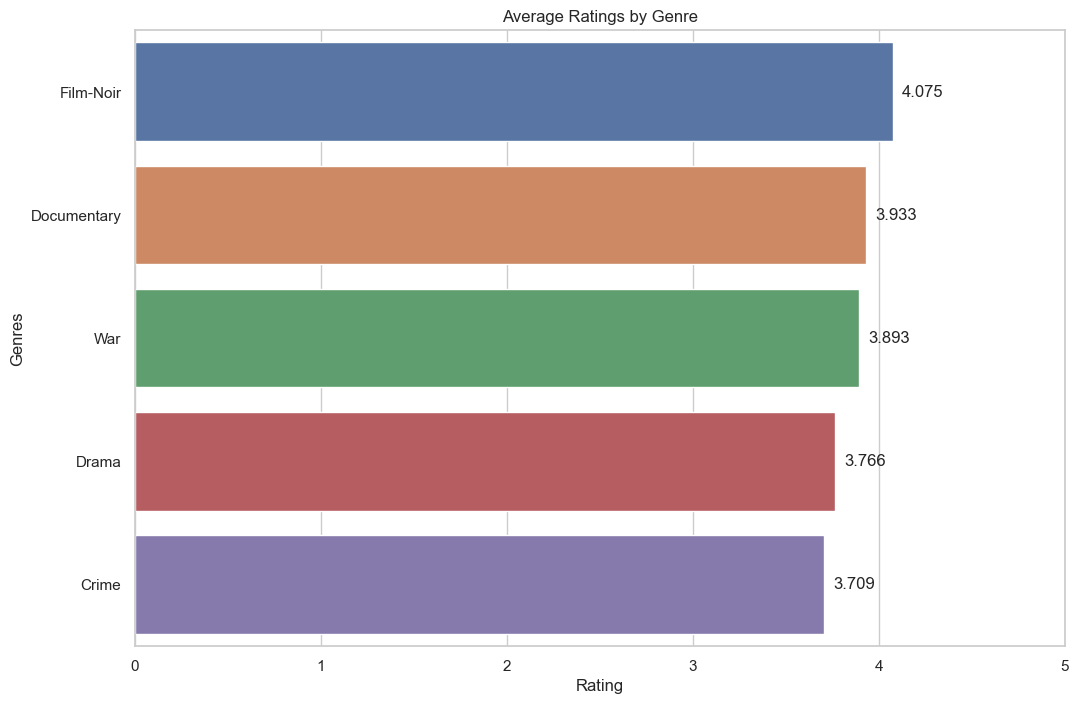

In [20]:
# 가장 평점이 높은 장르 top5

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='rating', y='genres', data=genre_rating_df)
plt.xlabel('Rating')
plt.ylabel('Genres')
plt.title('Average Ratings by Genre')
plt.xlim(0, 5)

# 각 막대의 중간에 레이팅 값 표시
for p in ax.patches:
    rating_value = p.get_width()  # 막대의 너비(레이팅 값)
    title = p.get_y() + p.get_height() / 2  # 막대의 중간 y 좌표
    ax.text(rating_value + 0.05, title, f'{rating_value:.3f}', va='center')  # 숫자 표시

plt.show()

In [21]:
users_df['Occupation'].value_counts()

4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: Occupation, dtype: int64

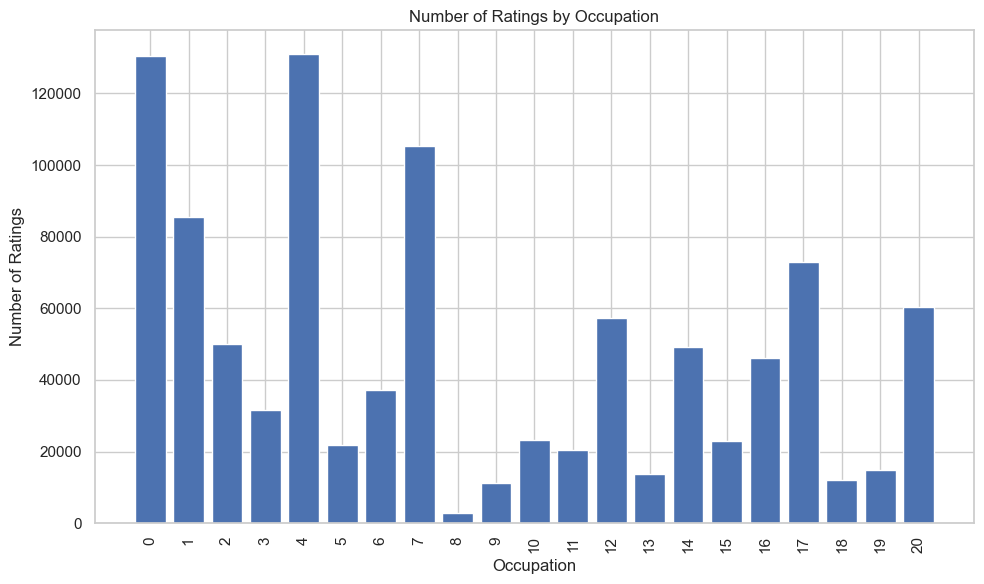

In [22]:
# 사용자의 직업과 평가 데이터를 병합
merged_data = ratings_df.merge(users_df, on='userId', how='inner')

# 직업별 평가 데이터 그룹화
occupation_ratings = merged_data.groupby('Occupation')['rating'].count().reset_index()
occupation_ratings = occupation_ratings.sort_values(by='Occupation', ascending=True)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(occupation_ratings['Occupation'], occupation_ratings['rating'])
plt.xlabel('Occupation')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings by Occupation')
plt.xticks(np.arange(len(occupation_ratings)), rotation=90)
plt.tight_layout()
plt.show()